In [1]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch.optim as optim

In [63]:
#FM
#LR是闭式解，但FM无法直接学习到，表现超越了LR，但注意发现如果学习率过小，表现甚至更差，意味着需要比较长的时间收敛
class FM(nn.Module):
    def __init__(self, n_features, k):
        super(FM, self).__init__()
        self.n_features = n_features
        self.k = k
        self.w0 = nn.Parameter(torch.zeros(1))
        self.w = nn.Parameter(torch.zeros(n_features))
        self.V = nn.Parameter(torch.randn(n_features, k) * (1.0 / np.sqrt(k)))
        
    def forward(self, X):
        linear_terms = torch.matmul(X, self.w).view(-1, 1) + self.w0  # 调整形状为 (batch_size, 1)
        interactions = 0.5 * torch.sum(
            torch.pow(torch.matmul(X, self.V), 2) - torch.matmul(torch.pow(X, 2), torch.pow(self.V, 2)),
            dim=1,
            keepdim=True
        )
        return linear_terms + interactions

def train_model(model, optimizer, criterion, X_train, y_train, n_iter):
    model.train()
    for epoch in range(n_iter):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{n_iter}], Loss: {loss.item():.4f}')

def evaluate_model(model, X_test, y_test_ten):
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test)
        y_pred = y_pred_tensor.numpy()
        y_pred = y_pred.flatten()
        mse = mean_squared_error(y_test_ten, y_pred) 
    return mse,y_pred 

Epoch [10/200], Loss: 4.7568
Epoch [20/200], Loss: 2.5828
Epoch [30/200], Loss: 1.8893
Epoch [40/200], Loss: 1.5924
Epoch [50/200], Loss: 1.4032
Epoch [60/200], Loss: 1.2946
Epoch [70/200], Loss: 1.2185
Epoch [80/200], Loss: 1.1707
Epoch [90/200], Loss: 1.1402
Epoch [100/200], Loss: 1.2677
Epoch [110/200], Loss: 1.2306
Epoch [120/200], Loss: 1.1367
Epoch [130/200], Loss: 1.1072
Epoch [140/200], Loss: 1.1026
Epoch [150/200], Loss: 1.0966
Epoch [160/200], Loss: 1.0956
Epoch [170/200], Loss: 1.1550
Epoch [180/200], Loss: 1.1148
Epoch [190/200], Loss: 1.1073
Epoch [200/200], Loss: 1.0946
Mean Squared Error: 1.1055232661992953


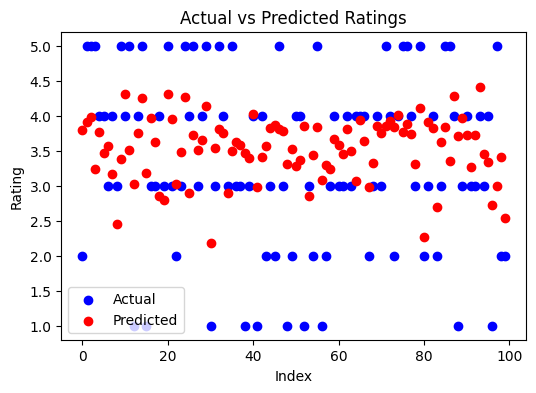

In [64]:
data1 = pd.read_csv('data1.csv')
data1.drop(data1.columns[0], axis=1,inplace=True)
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
n_features = X_train.shape[1]
k = 54
model = FM(n_features, k)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
n_iter = 200
train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, n_iter)
mse,y_pred = evaluate_model(model,X_test_tensor, y_test)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Epoch [10/200], Loss: 4.7039
Epoch [20/200], Loss: 2.7319
Epoch [30/200], Loss: 2.0541
Epoch [40/200], Loss: 1.6938
Epoch [50/200], Loss: 1.4988
Epoch [60/200], Loss: 1.3725
Epoch [70/200], Loss: 1.2904
Epoch [80/200], Loss: 1.2318
Epoch [90/200], Loss: 1.1893
Epoch [100/200], Loss: 1.1597
Epoch [110/200], Loss: 1.1390
Epoch [120/200], Loss: 1.1247
Epoch [130/200], Loss: 1.1149
Epoch [140/200], Loss: 1.1083
Epoch [150/200], Loss: 1.1039
Epoch [160/200], Loss: 1.1010
Epoch [170/200], Loss: 1.0992
Epoch [180/200], Loss: 1.0980
Epoch [190/200], Loss: 1.0983
Epoch [200/200], Loss: 1.1725
Mean Squared Error: 1.1505582337161404


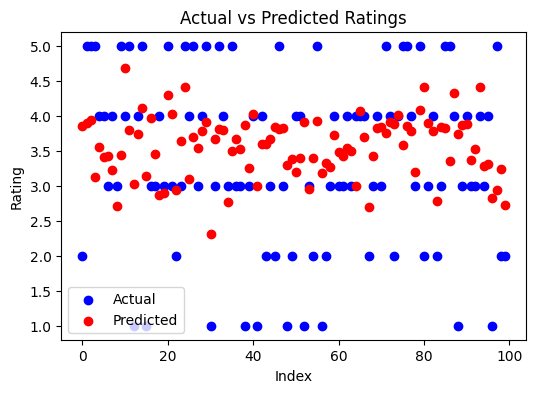

In [65]:
data2 = pd.read_csv('data2.csv')
data2.drop(data2.columns[0], axis=1,inplace=True)
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
n_features = X_train.shape[1]
k = 54
model = FM(n_features, k)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
n_iter = 200
train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, n_iter)
mse,y_pred = evaluate_model(model,X_test_tensor, y_test)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Epoch [10/200], Loss: 4.6151
Epoch [20/200], Loss: 2.6500
Epoch [30/200], Loss: 1.9705
Epoch [40/200], Loss: 1.6375
Epoch [50/200], Loss: 1.4593
Epoch [60/200], Loss: 1.3381
Epoch [70/200], Loss: 1.2566
Epoch [80/200], Loss: 1.2016
Epoch [90/200], Loss: 1.1632
Epoch [100/200], Loss: 1.1375
Epoch [110/200], Loss: 1.1206
Epoch [120/200], Loss: 1.1096
Epoch [130/200], Loss: 1.1025
Epoch [140/200], Loss: 1.0981
Epoch [150/200], Loss: 1.0954
Epoch [160/200], Loss: 1.1718
Epoch [170/200], Loss: 1.1290
Epoch [180/200], Loss: 1.0960
Epoch [190/200], Loss: 1.0942
Epoch [200/200], Loss: 1.0924
Mean Squared Error: 1.107575899681599


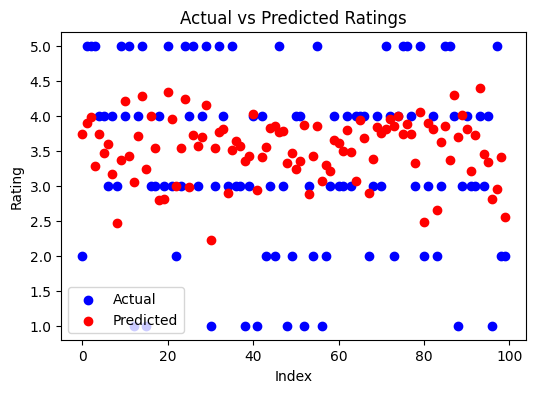

In [68]:
data3 = pd.read_csv('data3.csv')
data3.drop(data3.columns[0], axis=1,inplace=True)
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
n_features = X_train.shape[1]
k = 54
model = FM(n_features, k)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
n_iter = 200
train_model(model, optimizer, criterion, X_train_tensor, y_train_tensor, n_iter)
mse,y_pred = evaluate_model(model,X_test_tensor, y_test)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

In [125]:
#Wide&Deep
from torch.utils.data import Dataset, DataLoader
class MovieRatingDataset(Dataset):
    def __init__(self, X_cat, X_cont, y):
        self.X_cat = torch.tensor(X_cat.values, dtype=torch.long)
        self.X_cont = torch.tensor(X_cont, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X_cat[idx], self.X_cont[idx], self.y[idx]
class WideAndDeepModel(nn.Module):
    def __init__(self, categorical_dims, embedding_dim, num_cont_features):
        super(WideAndDeepModel, self).__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(input_dim, embedding_dim) for input_dim in categorical_dims
        ])
        self.deep = nn.Sequential(
            nn.Linear(len(categorical_dims) * embedding_dim + num_cont_features, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        self.wide = nn.Linear(len(categorical_dims) * embedding_dim + num_cont_features, 1)
    def forward(self, x_cat, x_cont):
        x_cat = [self.embeddings[i](x_cat[:, i]) for i in range(len(self.embeddings))]
        x_cat = torch.cat(x_cat, dim=1)
        x = torch.cat([x_cat, x_cont], dim=1)
        deep_out = self.deep(x)
        wide_out = self.wide(x)
        return wide_out + deep_out

In [126]:
from sklearn.preprocessing import LabelEncoder#在尝试labelencode的时候出现问题，即对于年份这种量，存在编码问题，无法嵌入,所以transform以后采用当作连续特征直接输入即可
def encode_features(train_df, test_df, continuous_features):
    encoded_train_df = train_df.copy()
    encoded_test_df = test_df.copy()
    label_encoders = {}
    
    for column in train_df.columns:
        if column not in continuous_features:
            le = LabelEncoder()
            encoded_train_df[column] = le.fit_transform(train_df[column])
            encoded_test_df[column] = le.transform(test_df[column])
            label_encoders[column] = le       
    return encoded_train_df, encoded_test_df, label_encoders

In [127]:
y = data1['rating']
X = data1.drop(columns=['rating'])
continuous_cols = ['release_date', 'user id', 'item id']
categorical_cols = X.drop(columns=continuous_cols).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_cat, X_test_cat, label_encoders = encode_features(X_train[categorical_cols], X_test[categorical_cols], continuous_cols)
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[continuous_cols])
X_test_cont = scaler.transform(X_test[continuous_cols])
train_dataset = MovieRatingDataset(X_train_cat, X_train_cont, y_train)
test_dataset = MovieRatingDataset(X_test_cat, X_test_cont, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

categorical_dims = [X_train[col].nunique() for col in categorical_cols]
model = WideAndDeepModel(categorical_dims, embedding_dim=4, num_cont_features=len(continuous_cols))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_cat_batch, X_cont_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_cat_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1)%10==0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
y_pred = []
with torch.no_grad():
    for X_cat_batch, X_cont_batch, _ in test_loader:
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        y_pred.extend(outputs.numpy())
y_pred = np.array(y_pred)
mse = np.mean((y_test.values - y_pred) ** 2)
print(f'MSE: {mse:.4f}')

Epoch 10/200, Loss: 1.3108
Epoch 20/200, Loss: 1.1629
Epoch 30/200, Loss: 1.1675
Epoch 40/200, Loss: 1.1678
Epoch 50/200, Loss: 1.1690
Epoch 60/200, Loss: 1.1673
Epoch 70/200, Loss: 1.1646
Epoch 80/200, Loss: 1.1706
Epoch 90/200, Loss: 1.1628
Epoch 100/200, Loss: 1.1668
Epoch 110/200, Loss: 1.1704
Epoch 120/200, Loss: 1.1720
Epoch 130/200, Loss: 1.1678
Epoch 140/200, Loss: 1.1689
Epoch 150/200, Loss: 1.1680
Epoch 160/200, Loss: 1.1690
Epoch 170/200, Loss: 1.1677
Epoch 180/200, Loss: 1.1694
Epoch 190/200, Loss: 1.1677
Epoch 200/200, Loss: 1.1760
MSE: 1.1610


In [128]:
y = data2['rating']
X = data2.drop(columns=['rating'])
continuous_cols = ['release_date', 'user id', 'item id']
categorical_cols = X.drop(columns=continuous_cols).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_cat, X_test_cat, label_encoders = encode_features(X_train[categorical_cols], X_test[categorical_cols], continuous_cols)
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[continuous_cols])
X_test_cont = scaler.transform(X_test[continuous_cols])
train_dataset = MovieRatingDataset(X_train_cat, X_train_cont, y_train)
test_dataset = MovieRatingDataset(X_test_cat, X_test_cont, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

categorical_dims = [X_train[col].nunique() for col in categorical_cols]
model = WideAndDeepModel(categorical_dims, embedding_dim=4, num_cont_features=len(continuous_cols))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_cat_batch, X_cont_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_cat_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1)%1==0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
y_pred = []
with torch.no_grad():
    for X_cat_batch, X_cont_batch, _ in test_loader:
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        y_pred.extend(outputs.numpy())
y_pred = np.array(y_pred)
mse = np.mean((y_test.values - y_pred) ** 2)
print(f'MSE: {mse:.4f}')

Epoch 1/200, Loss: 10.6481
Epoch 2/200, Loss: 1.1641
Epoch 3/200, Loss: 1.1710
Epoch 4/200, Loss: 1.1755
Epoch 5/200, Loss: 1.1853
Epoch 6/200, Loss: 1.1744
Epoch 7/200, Loss: 1.1644
Epoch 8/200, Loss: 1.1840
Epoch 9/200, Loss: 4.6908
Epoch 10/200, Loss: 1.3951
Epoch 11/200, Loss: 1.3580
Epoch 12/200, Loss: 1.3679
Epoch 13/200, Loss: 1.4078
Epoch 14/200, Loss: 1.3400
Epoch 15/200, Loss: 1.3305
Epoch 16/200, Loss: 1.3268
Epoch 17/200, Loss: 1.3223
Epoch 18/200, Loss: 1.2801
Epoch 19/200, Loss: 1.2473
Epoch 20/200, Loss: 1.2051
Epoch 21/200, Loss: 1.1876
Epoch 22/200, Loss: 1.3224
Epoch 23/200, Loss: 1.2266
Epoch 24/200, Loss: 1.1706
Epoch 25/200, Loss: 1.1612
Epoch 26/200, Loss: 1.1608
Epoch 27/200, Loss: 1.1635
Epoch 28/200, Loss: 1.1740
Epoch 29/200, Loss: 1.1794
Epoch 30/200, Loss: 1.1754
Epoch 31/200, Loss: 1.1839
Epoch 32/200, Loss: 1.1767
Epoch 33/200, Loss: 1.1805
Epoch 34/200, Loss: 1.1837
Epoch 35/200, Loss: 1.1825
Epoch 36/200, Loss: 1.1794
Epoch 37/200, Loss: 1.1811
Epoch 38/

In [133]:
#数据集三包含大量的连续量
y = data3['rating']
X = data3.drop(columns=['rating'])
continuous_cols = ['release_date', 'user id', 'item id','age','timestamp']
categorical_cols = X.drop(columns=continuous_cols).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_cat, X_test_cat, label_encoders = encode_features(X_train[categorical_cols], X_test[categorical_cols], continuous_cols)
scaler = StandardScaler()
X_train_cont = scaler.fit_transform(X_train[continuous_cols])
X_test_cont = scaler.transform(X_test[continuous_cols])
train_dataset = MovieRatingDataset(X_train_cat, X_train_cont, y_train)
test_dataset = MovieRatingDataset(X_test_cat, X_test_cont, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

categorical_dims = [X_train[col].nunique() for col in categorical_cols]
model = WideAndDeepModel(categorical_dims, embedding_dim=4, num_cont_features=len(continuous_cols))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_cat_batch, X_cont_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_cat_batch.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1)%1==0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

model.eval()
y_pred = []
with torch.no_grad():
    for X_cat_batch, X_cont_batch, _ in test_loader:
        outputs = model(X_cat_batch, X_cont_batch).squeeze()
        y_pred.extend(outputs.numpy())
y_pred = np.array(y_pred)
mse = np.mean((y_test.values - y_pred) ** 2)
print(f'MSE: {mse:.4f}')

Epoch 1/200, Loss: 3.6597
Epoch 2/200, Loss: 1.1302
Epoch 3/200, Loss: 1.1252
Epoch 4/200, Loss: 1.1471
Epoch 5/200, Loss: 1.1563
Epoch 6/200, Loss: 1.2279
Epoch 7/200, Loss: 1.1703
Epoch 8/200, Loss: 1.1676
Epoch 9/200, Loss: 1.1839
Epoch 10/200, Loss: 1.1872
Epoch 11/200, Loss: 1.1191
Epoch 12/200, Loss: 1.1810
Epoch 13/200, Loss: 1.7358
Epoch 14/200, Loss: 1.2796
Epoch 15/200, Loss: 1.2863
Epoch 16/200, Loss: 1.2709
Epoch 17/200, Loss: 1.2586
Epoch 18/200, Loss: 1.2723
Epoch 19/200, Loss: 1.2514
Epoch 20/200, Loss: 1.2303
Epoch 21/200, Loss: 1.1936
Epoch 22/200, Loss: 1.1650
Epoch 23/200, Loss: 1.1410
Epoch 24/200, Loss: 1.1205
Epoch 25/200, Loss: 1.1155
Epoch 26/200, Loss: 1.1179
Epoch 27/200, Loss: 1.1272
Epoch 28/200, Loss: 1.1239
Epoch 29/200, Loss: 1.1229
Epoch 30/200, Loss: 1.1311
Epoch 31/200, Loss: 1.1235
Epoch 32/200, Loss: 1.1266
Epoch 33/200, Loss: 1.1288
Epoch 34/200, Loss: 1.1245
Epoch 35/200, Loss: 1.1283
Epoch 36/200, Loss: 1.1294
Epoch 37/200, Loss: 1.1337
Epoch 38/2

In [10]:
#GBDT+LR #根据原文只要是集成树都可以,但我的测试表明rf表现不如GBDT
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
lr = LinearRegression()
lr.fit(X_train_gbdt, y_train)
y_pred_test = lr.predict(X_test_gbdt)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {test_mse:.4f}')

Test MSE: 1.0024


In [11]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
lr = LinearRegression()
lr.fit(X_train_gbdt, y_train)
y_pred_test = lr.predict(X_test_gbdt)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {test_mse:.4f}')

Test MSE: 1.0169


In [12]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
lr = LinearRegression()
lr.fit(X_train_gbdt, y_train)
y_pred_test = lr.predict(X_test_gbdt)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f'Test MSE: {test_mse:.4f}')

Test MSE: 1.0098


In [22]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))        
        x = self.fc4(x)
        return x

In [23]:
##GBDT+MLP
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
X_train_tensor = torch.tensor(X_train_gbdt, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_gbdt, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

input_dim = X_train_gbdt.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Epoch [10/200], Loss: 2.6059
Epoch [20/200], Loss: 1.8214
Epoch [30/200], Loss: 1.7268
Epoch [40/200], Loss: 1.6716
Epoch [50/200], Loss: 1.6635
Epoch [60/200], Loss: 1.6546
Epoch [70/200], Loss: 1.6459
Epoch [80/200], Loss: 1.6369
Epoch [90/200], Loss: 1.6269
Epoch [100/200], Loss: 1.6171
Epoch [110/200], Loss: 1.6071
Epoch [120/200], Loss: 1.5968
Epoch [130/200], Loss: 1.5865
Epoch [140/200], Loss: 1.5760
Epoch [150/200], Loss: 1.5654
Epoch [160/200], Loss: 1.5547
Epoch [170/200], Loss: 1.5439
Epoch [180/200], Loss: 1.5329
Epoch [190/200], Loss: 1.5218
Epoch [200/200], Loss: 1.5100
Mean Squared Error: 1.5324800905060942


In [24]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
X_train_tensor = torch.tensor(X_train_gbdt, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_gbdt, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

input_dim = X_train_gbdt.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Epoch [10/200], Loss: 13.9929
Epoch [20/200], Loss: 11.4959
Epoch [30/200], Loss: 4.7029
Epoch [40/200], Loss: 1.7720
Epoch [50/200], Loss: 1.3244
Epoch [60/200], Loss: 1.4478
Epoch [70/200], Loss: 1.2661
Epoch [80/200], Loss: 1.2760
Epoch [90/200], Loss: 1.2710
Epoch [100/200], Loss: 1.2633
Epoch [110/200], Loss: 1.2634
Epoch [120/200], Loss: 1.2634
Epoch [130/200], Loss: 1.2631
Epoch [140/200], Loss: 1.2630
Epoch [150/200], Loss: 1.2630
Epoch [160/200], Loss: 1.2630
Epoch [170/200], Loss: 1.2630
Epoch [180/200], Loss: 1.2630
Epoch [190/200], Loss: 1.2630
Epoch [200/200], Loss: 1.2630
Mean Squared Error: 1.2776390513900824


In [25]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbdt = GradientBoostingRegressor(n_estimators=500)
gbdt.fit(X_train_scaled, y_train)
X_train_gbdt = gbdt.apply(X_train_scaled)
X_test_gbdt = gbdt.apply(X_test_scaled)
X_train_tensor = torch.tensor(X_train_gbdt, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_gbdt, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

input_dim = X_train_gbdt.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Epoch [10/200], Loss: 2.5512
Epoch [20/200], Loss: 1.9015
Epoch [30/200], Loss: 1.6221
Epoch [40/200], Loss: 1.4917
Epoch [50/200], Loss: 1.4210
Epoch [60/200], Loss: 1.3616
Epoch [70/200], Loss: 1.3119
Epoch [80/200], Loss: 1.2794
Epoch [90/200], Loss: 1.2550
Epoch [100/200], Loss: 1.2327
Epoch [110/200], Loss: 1.2129
Epoch [120/200], Loss: 1.1973
Epoch [130/200], Loss: 1.1855
Epoch [140/200], Loss: 1.1768
Epoch [150/200], Loss: 1.1703
Epoch [160/200], Loss: 1.1646
Epoch [170/200], Loss: 1.1593
Epoch [180/200], Loss: 1.1543
Epoch [190/200], Loss: 1.1495
Epoch [200/200], Loss: 1.1448
Mean Squared Error: 1.154118438283097
